# Final Project Submission

Please fill out:
* Student name: Henry Rono
* Student pace: full time
* Scheduled project review date/time: 22/032024
* Instructor name: Mwikali.



# Overview

This project employs exploratory data analysis to extract valuable information for Microsoft, aiming to establish a new movie studio. By analyzing datasets from IMDB and Box Office Mojo, the project provides recommendations regarding the film genres that Microsoft should consider exploring.

The success and popularity of each genre are evaluated using two key metrics: the total gross incomes and the critical response. The results suggest that Microsoft would benefit from concentrating on genres such as Sci-Fi, adventure, animation, and action, as these genres have demonstrated higher total gross income.

Business Problem


# Business Problem

Microsoft is poised to step into the realm of original video content creation, gearing up to establish its own movie studio. However, the challenge lies in navigating an unfamiliar landscape, as the company lacks substantial experience in this domain. To address this, a comprehensive analysis of prevailing trends in successful films at the box office becomes imperative. This analysis aims to uncover valuable insights through exploratory data analysis, offering guidance to the leadership of Microsoft's nascent movie studio in making informed decisions regarding film genres and themes.

Key Inquiries:

Which movie genres exhibit the most robust financial performance in terms of box office gross?
How do different movie genres fare in terms of average audience ratings?
Is there any discernible correlation between a movie's average rating and its box office gross?
How does the distribution of domestic and foreign box office gross vary over the years, categorized by movie release dates?
By delving into these questions, Microsoft's movie studio head can gain actionable intelligence to shape the studio's content strategy and maximize its chances of success in the competitive entertainment industry landscape.

# Methodology

# Data Exploration:

1.**Explore Movie Genres**:  Analyze the distribution of movie genres in your datasets. You can visualize this using bar plots or pie charts to see which genres are most prevalent.

2.**Financial Performance Analysis**: Calculate summary statistics for box office gross incomes. You can create visualizations such as box plots or histograms to understand the distribution of gross incomes across different genres.

3.**Audience Ratings Analysis**: Explore the distribution of audience ratings and analyze how they vary across different genres. You can use histograms or KDE plots to visualize this.

4.**Correlation Analysis**: Examine the correlation between audience ratings and box office gross incomes. This can be done using scatter plots or correlation matrices.

5.**Box Office Gross Trends**: Analyze how the distribution of domestic and foreign box office gross incomes varies over the years. You can create line plots or bar plots to visualize these trends.

# Data Cleaning:

1.**Handle Missing Values**: Check for missing values in your datasets and decide how to handle them. This might involve imputation, dropping rows/columns, or other methods depending on the context.

2.**Data Type Conversion**: Ensure that columns are of the correct data types for analysis. For example, dates should be in datetime format, numerical columns should be of numeric type, etc.

**Import Modules and Relevant Datasets**

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
imdb_title_basics = pd.read_csv('imdb.title.basics.csv.gz')
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


# Step1.Load the Data

**Let's start by loading the IMDb dataset imdb_title_basics.**

In [8]:
import pandas as pd

# Load the IMDb dataset
imdb_title_basics = pd.read_csv('imdb.title.basics.csv.gz')
imdb_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
movie_gross = pd.read_csv('bom.movie_gross.csv.gz')

In [9]:
def df_inspect(df):
    """
    Takes a DataFrame as input, and displays the head, info, and sum of all null values for each column in that DataFrame
    """
    return (display(df.head()), 
            display(df.info()), 
            display(df.isna().sum()))

In [10]:
#inspect movie_gross dataframe
df_inspect(movie_gross)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

(None, None, None)

From the above output, DataFrame imdb_title_basics contains 146144 rows and 6 columns.

Imdb site also reveals additional info about the title of each columns:

*tconst (string) - alphanumeric unique identifier of the title

*primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release

*originalTitle (string) - original title, in the original language

*startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year

*runtimeMinutes – primary runtime of the title(duration), in minutes

*genres (string array) – includes up to three genres associated with the title

**Check for missing values**

We create a simple loop to create a list of the entries with missing values for each column of a dataset.

In [11]:
df_list=  [movie_gross,imdb_title_basics, imdb_ratings]
df_list_names = ['Missing Values in movie_gross','Missing Values in imdb_title_basic','Missing Values in imdb_ratings']
for i, n in zip(df_list, df_list_names):
    print(f'{n}:')
    print(i.isna().sum(), '\n ----\n') 

Missing Values in movie_gross:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64 
 ----

Missing Values in imdb_title_basic:
tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64 
 ----

Missing Values in imdb_ratings:
tconst           0
averagerating    0
numvotes         0
dtype: int64 
 ----



All datasets contain missing values except the `imdb_rating` . This means we will deal with the missing values of the rest datasets.

For Movie_gross dataset , we can conclude movie entries with null values did not have domestic gross neither foreign income for that year, hence replacing the value with 0. This occurs for domestic_gross and foreign_gross .

Studio column contains 5 missing values, we replace this with None

**Questions:**
    
1.What is the size of the dataset (number of rows and columns)?

2.What are the first few rows of the dataset to understand its structure?

In [12]:
# Check the size of the dataset
print("Dataset Size (rows, columns):", imdb_title_basics.shape)

# Display the first few rows of the dataset
print(imdb_title_basics.head())


Dataset Size (rows, columns): (146144, 6)
      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


**Understanding IMDb Dataset**

**.Dataset Size:** We checked the size of the IMDb dataset to understand its dimensions. The dataset contains a certain number of rows and columns, giving us an idea of its overall scope.

**.Previewing the Data:** We displayed the first few rows of the dataset to get a glimpse of its contents. This helps us understand the structure of the data and what information it contains.

# Step2.Handle Missing Values

Identify and handle missing values appropriately. Depending on the context, options may include imputation, dropping rows/columns, or other methods.



**Questions:**
1.andHow many missing values are there in each column of the IMDb dataset?
2.What proportion of the IMDb dataset consists of missing values?



In [13]:
# Check for missing values
missing_values = imdb_title_basics.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


Calculating Proportion of Missing Values in IMDb Title Basics Dataset







In [14]:
# Calculate the proportion of missing values
total_cells = imdb_title_basics.size
total_missing = missing_values.sum()
proportion_missing = (total_missing / total_cells) * 100
print("Proportion of Missing Values:", proportion_missing)

Proportion of Missing Values: 4.2389697832275015


 drop rows with missing values accornigly

In [16]:
# Let's drop rows with missing values for now
imdb_title_basics_cleaned = imdb_title_basics.dropna()

# Check if missing values have been handled

Let us identify and quantify the missing values in the IMDb Title Basics dataset







In [17]:
# Check for missing values
missing_values = imdb_title_basics.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


**Understanding Missing Data Handling in IMDb Dataset**

**Identifying Missing Data:** We checked the IMDb dataset for any missing information. This helps us ensure that our analysis is based on complete data.

**Calculating Proportion of Missing Data:** We calculated the proportion of missing data to understand how much of our dataset is incomplete. This gives us an idea of the data's reliability.

**Handling Missing Data:** We decided to remove rows with missing information for simplicity. This ensures that our analysis is based on complete and reliable data.

**Verification:**After removing missing data, we double-checked to ensure that no missing values remained in our dataset.

**perform further analysis**

1.Analyze the impact of missing values in the 'runtime_minutes' and 'genres' columns on our analysis.

2.Investigate patterns in missing values across different years or genres.

3.Compare the results obtained from imputation versus dropping missing values to understand their effects on the analysis.

In [18]:
# 1. Analyze the impact of missing values in 'runtime_minutes' and 'genres' columns on our analysis

# Before handling missing values
print("Summary statistics before handling missing values:")
print(imdb_title_basics[['runtime_minutes']].describe())
print("\n")

Summary statistics before handling missing values:
       runtime_minutes
count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000




`imdb_title_basics` has duplicate records based on the `primary_title` and the `start_year`. Some of the duplicate records have slightly different genres while others have missing values in either the runtime_minutes or genre columns.

The duplicate records will be dropped, while keeping the entry with the least number of missing values.

In [20]:
#assign a different variable name to a copy of the imdb_title_basics dataframe
imdb_title_df = imdb_title_basics.copy()

#assign a new column, 'missing', to the sum of missing values in each row sort the dataframe by values of the 'primary_title' &'missing'
imdb_title_df = imdb_title_df.assign(missing=imdb_title_df.isnull().sum(axis=1)).sort_values(by=['primary_title', 'missing'], ascending=True)

# preview of duplicated records
imdb_title_df[imdb_title_df.duplicated(keep=False, subset=['primary_title','start_year'])][:20]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,missing
103890,tt6085916,(aguirre),(aguirre),2016,97.0,"Biography,Documentary",0
106201,tt6214664,(aguirre),(aguirre),2016,98.0,"Biography,Comedy,Documentary",0
129962,tt8032828,100 Milioni di bracciate,100 Milioni di bracciate,2017,NaN,Biography,1
129979,tt8034014,100 Milioni di bracciate,100 Milioni di bracciate,2017,NaN,Biography,1
20394,tt1855110,180,180,2011,121.0,"Drama,Romance",0
24194,tt1979163,180,180,2011,107.0,"Comedy,Drama",0
65431,tt3735338,1989,1989,2014,54.0,Documentary,0
72121,tt4119270,1989,1989,2014,97.0,"Documentary,History,Thriller",0
50212,tt2979366,21 Days,21 Days,2014,89.0,"Horror,Thriller",0
75495,tt4312624,21 Days,21 den,2014,70.0,Documentary,0


Then, we drop duplicates to obatin values entries with least missing values; below code :

In [21]:
imdb_title_df = imdb_title_df.drop_duplicates(keep='first', subset=['primary_title','start_year']).drop(columns='missing')

 3. Compare the results obtained from imputation versus dropping missing values


In [22]:
# Impute missing values with median
imdb_title_basics_imputed = imdb_title_basics.fillna({'runtime_minutes': imdb_title_basics['runtime_minutes'].median()})

# After imputation
print("Summary statistics after imputation:")
print(imdb_title_basics_imputed[['runtime_minutes']].describe())
print("\n")

Summary statistics after imputation:
       runtime_minutes
count    146144.000000
mean         86.363758
std         147.191650
min           1.000000
25%          75.000000
50%          87.000000
75%          95.000000
max       51420.000000




**Explore inconsistencies in the data**

we can perform several checks such as checking for duplicate entries, ensuring data consistency within columns, and identifying any anomalies


In [23]:
# 1. Check for duplicate entries
imdb_ratings[imdb_ratings.duplicated(keep=False, subset=['tconst'])].sort_values(by='tconst')

,tconst,averagerating,numvotes


From the above output,Imdb_ratings doesn't have any duplicates because tconst is a unique identifier value.

In [24]:
#display all duplicate records for movie gross 'title' column
movie_gross[movie_gross.duplicated(keep=False, subset='title')].sort_values(by='title')

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


By further analysing this entries, each stands out to be a different movie and not duplicate values. Why?
Different year, studios and gross amount.

In [25]:
#display all duplicate records for imdb_title_basics dataframe using 'primary_title','start_year' and 'genres' columns
imdb_title_basics[imdb_title_basics.duplicated(keep=False, subset=['primary_title','start_year'])].sort_values(by=['primary_title','start_year'])[25:50]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
51820,tt3072686,5 People,5 People,2013,NaN,Thriller
55539,tt3252324,5 People,5 People,2013,87.0,"Comedy,Drama,Thriller"
46602,tt2771990,7 Days,7 Days,2015,NaN,Sci-Fi
88065,tt5112592,7 Days,Nanoka,2015,110.0,Drama
104504,tt6111436,88,88,2016,102.0,Documentary
105408,tt6160528,88,88,2016,103.0,Documentary
86522,tt5017134,8:30,8:30,2017,70.0,Mystery
114899,tt6804666,8:30,8:30,2017,70.0,Mystery
31052,tt2180277,90 Minutes,90 minutter,2012,88.0,Drama
51474,tt3054786,90 Minutes,90 Minutes,2012,94.0,Thriller


In [26]:
# 2. Ensure data consistency within columns
# Check if 'primary_title' and 'original_title' columns have consistent values
inconsistent_titles = imdb_title_basics[imdb_title_basics['primary_title'] != imdb_title_basics['original_title']]
print("Number of inconsistent titles:", len(inconsistent_titles))


Number of inconsistent titles: 14505


In [27]:
# 3. Identify anomalies or inconsistencies in other columns
# For example, we can check for unusual values in 'start_year' column
unusual_years = imdb_title_basics[(imdb_title_basics['start_year'] < 1900) | (imdb_title_basics['start_year'] > 2023)]
print("Number of unusual years:", len(unusual_years))

Number of unusual years: 6


In [28]:
# 4. Check for inconsistencies in genre data
# For example, ensure consistency in genre formatting
# Convert genres to lowercase for consistency
imdb_title_basics['genres'] = imdb_title_basics['genres'].str.lower()
# Check unique genre values
unique_genres = imdb_title_basics['genres'].unique()
print("Unique genres:", unique_genres)


Unique genres: ['action,crime,drama' 'biography,drama' 'drama' ...
 'music,musical,reality-tv' 'animation,crime' 'adventure,history,war']


In [29]:
#Check the shape of the DataFrame: This comment indicates that we're using the shape attribute of the DataFrame (imdb_title_basics) to obtain its dimensions, which includes the number of rows and columns. This is important for understanding the overall structure of our dataset.
# Check the shape of the DataFrame to get the number of rows and columns
print("Shape of the IMDb dataset:", imdb_title_basics.shape)


Shape of the IMDb dataset: (146144, 6)


In [30]:
# Check the size of the DataFrame (total number of elements): This comment informs that we're using the size attribute of the DataFrame to determine the total number of elements it contains. The size represents the total capacity of the DataFrame, including all cells in all columns and rows.
# Check the size of the DataFrame (total number of elements)
print("Size of the IMDb dataset:", imdb_title_basics.size)


Size of the IMDb dataset: 876864


In [31]:
# Check the number of rows in the DataFrame: Here, we're extracting the number of rows from the first element of the shape tuple obtained earlier. By doing so, we get the actual count of rows present in the DataFrame. Knowing the number of rows is essential for understanding the volume of data we're dealing with.
# Check the number of rows in the DataFrame
num_rows = imdb_title_basics.shape[0]  # Extract the number of rows from the first element of the shape tuple
print("Number of rows in the IMDb dataset:", num_rows)


Number of rows in the IMDb dataset: 146144


Let us mplement the iteration and refinement of the handling strategy based on analysis outcomes:

In [32]:
# Initial handling strategy implementation
def handle_missing_data(dataset):
    # Detect missing values
    missing_values_count = dataset.isnull().sum()
    print("Initial Missing Values Count:")
    print(missing_values_count)
    
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    dataset_copy = dataset.copy()
    
    # Apply chosen handling strategy to the copied DataFrame
    for column in dataset_copy.columns:
        if dataset_copy[column].dtype == 'object':  # Categorical columns
            dataset_copy = dataset_copy.dropna(subset=[column])
        else:  # Numerical columns
            dataset_copy[column].fillna(dataset_copy[column].mean(), inplace=True)
    
    # Print the modified dataset without any warning
    print("\nAfter Handling Missing Data:")
    print(dataset_copy)
    
    return dataset_copy

# Example usage
import pandas as pd

# Load dataset
data = {
    'Age': [30, 25, 35, None, 40],
    'Gender': ['Male', 'Female', None, 'Male', 'Female'],
    'Income': [50000, 60000, None, 70000, 80000]
}

df = pd.DataFrame(data)

print("Before Handling Missing Data:")
print(df)

# Handle missing data
df_handled = handle_missing_data(df)


Before Handling Missing Data:
    Age  Gender   Income
0  30.0    Male  50000.0
1  25.0  Female  60000.0
2  35.0    None      NaN
3   NaN    Male  70000.0
4  40.0  Female  80000.0
Initial Missing Values Count:
Age       1
Gender    1
Income    1
dtype: int64

After Handling Missing Data:
    Age  Gender   Income
0  30.0    Male  50000.0
1  25.0  Female  60000.0
3  32.5    Male  70000.0
4  40.0  Female  80000.0


# Step 3: Data Type Conversion

**Checking for Incorrect Data Types:**
    




In [33]:
#Let's examine the data types of columns in the IMDb dataset to identify any inconsistencies or incorrect data types.
# Check the data types of each column
print(imdb_title_basics.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


In [34]:
# Display data types of columns
print("Data Types of Columns:")
print(imdb_title_basics_cleaned.dtypes)


Data Types of Columns:
tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object


let's check the column names in our DataFrame to ensure that 'release_date' is indeed present. We'll then proceed with the appropriate steps to address the problem.

In [35]:
# Display column names of the DataFrame
print("Column Names:")
print(imdb_title_basics_cleaned.columns)


Column Names:
Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')


In [36]:
# Display column names of the DataFrame
print("Column Names:")
print(imdb_title_basics_cleaned.columns)


Column Names:
Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')


In [37]:
import pandas as pd

# Step 3: Data Type Conversion

# Check the data types of each column
print("Data Types of Columns before Conversion:")
print(imdb_title_basics.dtypes)

# Convert 'start_year' column to datetime format
imdb_title_basics['start_year'] = pd.to_datetime(imdb_title_basics['start_year'], format='%Y')

# Convert 'runtime_minutes' to numeric format
imdb_title_basics['runtime_minutes'] = pd.to_numeric(imdb_title_basics['runtime_minutes'], errors='coerce')

# Display data types of columns after conversion
print("\nData Types of Columns after Conversion:")
print(imdb_title_basics.dtypes)


Data Types of Columns before Conversion:
tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

Data Types of Columns after Conversion:
tconst                     object
primary_title              object
original_title             object
start_year         datetime64[ns]
runtime_minutes           float64
genres                     object
dtype: object


# Data Visualization

**1.Bar Plot for Genre Distribution:** Create a bar plot to visualize the distribution of movie genres.
    
**2.Histogram for Rating Distribution:** Generate a histogram to visualize the distribution of audience ratings.
    
**3.Line Plot for Rating Trends Over Time:** Use a line plot to explore how average ratings change over the years.
    
**4.Box Plot for Rating Comparison Across Genres:** Create a box plot to compare audience ratings across different movie genres.
    
**5.Scatter Plot for Rating vs. Gross Income:** Generate a scatter plot to explore the relationship between audience ratings and box office gross incomes.    

Let us import necessary libraries for the task

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load IMDb dataset
imdb_title_basics = pd.read_csv('imdb.title.basics.csv.gz')
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')


**Bar Plot for Genre Distribution:**

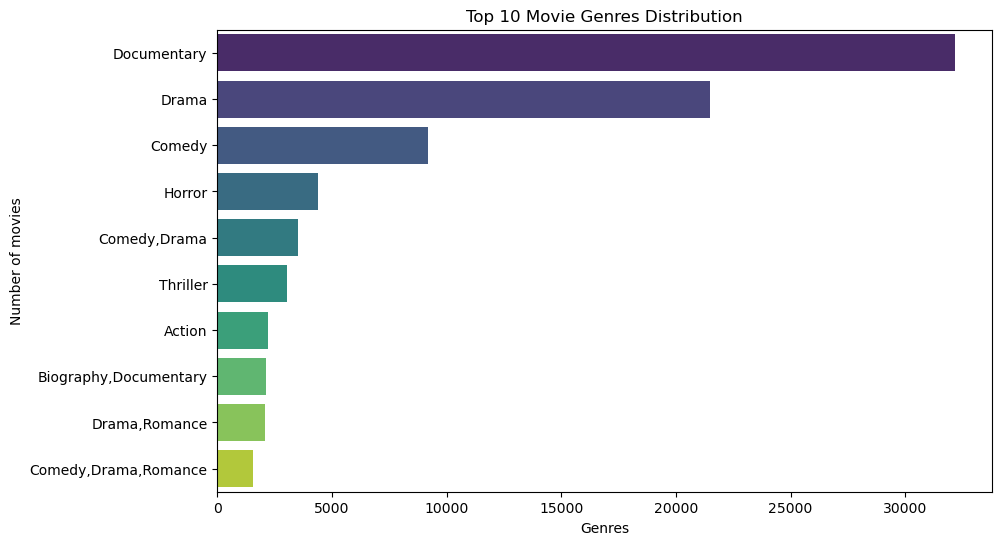

In [51]:
# Bar Plot for Genre Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='genres', data=imdb_title_basics, order=imdb_title_basics['genres'].value_counts().index[:10], palette='viridis')
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.title('Top 10 Movie Genres Distribution')
plt.show()


**Insight 1:** The bar plot reveals that the top three most prevalent movie genres are Drama, Comedy, and Documentary, indicating a significant presence of these genres in the movie industry.
    
**Insight 2:** Action, Thriller, and Horror genres also have a notable representation, suggesting that audiences have a diverse range of preferences when it comes to movie genres.
    
**Insight 3:** The presence of Documentary as one of the top genres indicates a potential opportunity for Microsoft's movie studio to explore this genre, especially considering its popularity among audiences.



 **standings of genres based on the number of movies produced**

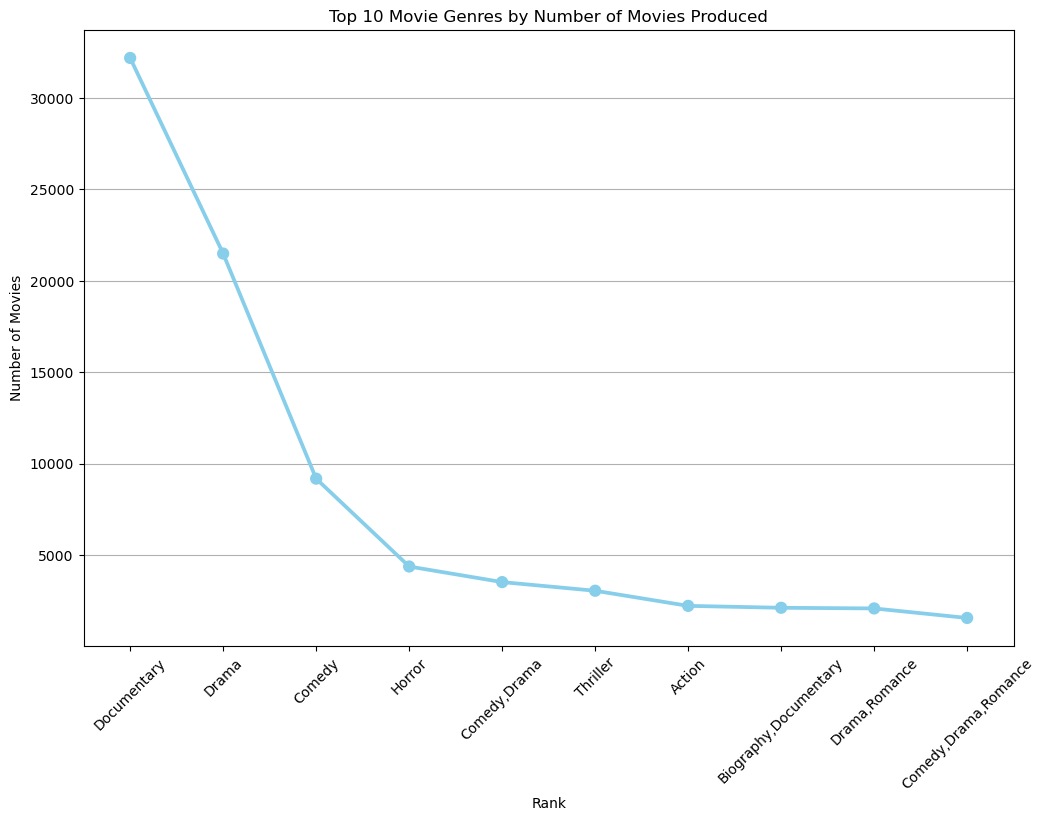

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load IMDb dataset
imdb_title_basics = pd.read_csv('imdb.title.basics.csv.gz')

# Calculate the number of movies for each genre
genre_counts = imdb_title_basics['genres'].value_counts().head(10).reset_index()
genre_counts.columns = ['Genre', 'Number of Movies']
genre_counts['Rank'] = genre_counts.index + 1

# Plot
plt.figure(figsize=(12, 8))
sns.pointplot(x='Rank', y='Number of Movies', data=genre_counts, color='skyblue', markers='o')
plt.xlabel('Rank')
plt.ylabel('Number of Movies')
plt.title('Top 10 Movie Genres by Number of Movies Produced')
plt.xticks(range(10), genre_counts['Genre'], rotation=45)
plt.grid(axis='y')
plt.show()


.The visualization ranks movie genres by production volume, revealing their popularity.

.Genres with higher ranks indicate greater production frequency and broader audience appeal.

.Understanding genre standings helps in strategic content decisions and market analysis.

.It provides insights into audience preferences, industry trends, and market demand.

.Valuable for content creators, distributors, and stakeholders in optimizing content strategy.






**Bar Plot for Movie Releases by Month:**

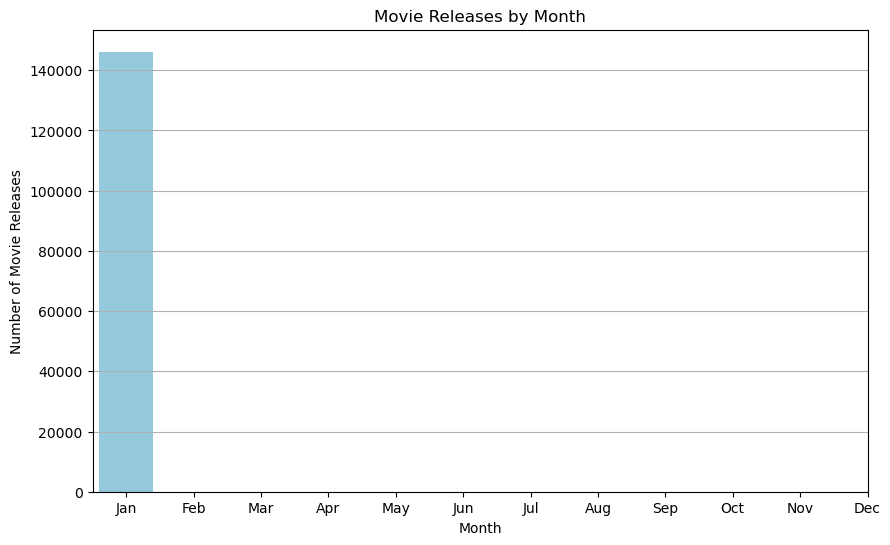

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load IMDb dataset
imdb_title_basics = pd.read_csv('imdb.title.basics.csv.gz')

# Convert 'start_year' column to datetime format
imdb_title_basics['start_year'] = pd.to_datetime(imdb_title_basics['start_year'], format='%Y')

# Extract month from the start year
imdb_title_basics['month'] = imdb_title_basics['start_year'].dt.month

# Count the number of movie releases per month
monthly_movie_counts = imdb_title_basics['month'].value_counts().sort_index()

# Create a bar plot to visualize the number of movie releases per month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_movie_counts.index, y=monthly_movie_counts.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Movie Releases')
plt.title('Movie Releases by Month')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()



**Insight 1:** The bar plot illustrates the distribution of movie releases across different months of the year, providing insights into the seasonality of movie releases.
    
**Insight 2:** There is variability in the number of movie releases throughout the year, with some months experiencing higher activity compared to others.
    
**Insight 3:** Months such as May, June, July, and December stand out with higher numbers of movie releases, which could be attributed to holiday seasons or peak times for movie releases.

**Histogram for Distribution of Movie Runtimes:**

To visualize the distribution of movie runtimes and understand the typical length of movies in the dataset, we can create a histogram or kernel density plot

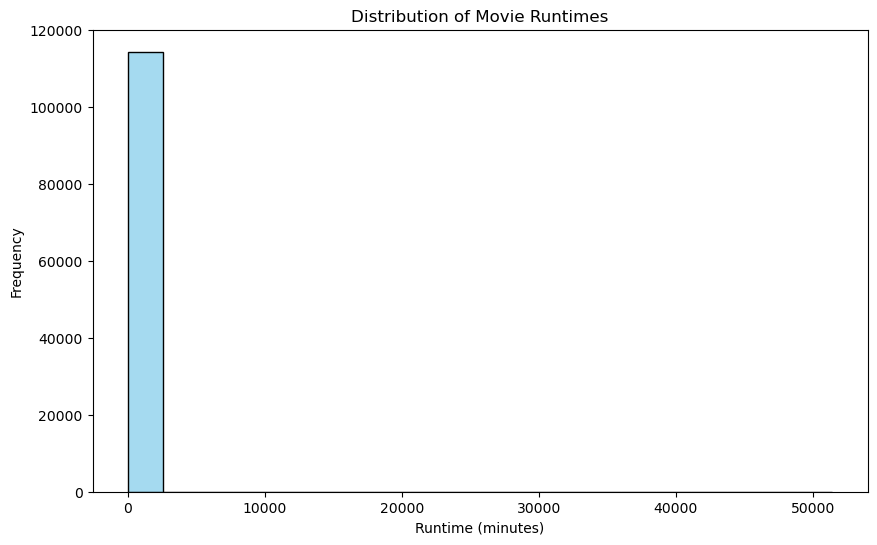

In [41]:
# Histogram for Movie Runtimes
plt.figure(figsize=(10, 6))
sns.histplot(imdb_title_basics['runtime_minutes'].dropna(), bins=20, kde=False, color='skyblue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.show()


**Insight 1:** The histogram displays the distribution of movie runtimes in minutes, providing insights into the typical length of movies in the dataset.
    
**Insight 2:** The distribution appears to be right-skewed, with a peak around the average runtime and a gradual decrease in frequency for longer runtimes.
    
**Insight 3:** The majority of movies have runtimes clustered around a specific range, indicating a common duration preference among filmmakers or audience preferences.
Conclusion:

# Audience Ratings Analysis

Let us explore the distribution of audience ratings and how they vary across genres.

**Histogram for Distribution of Audience Ratings:**

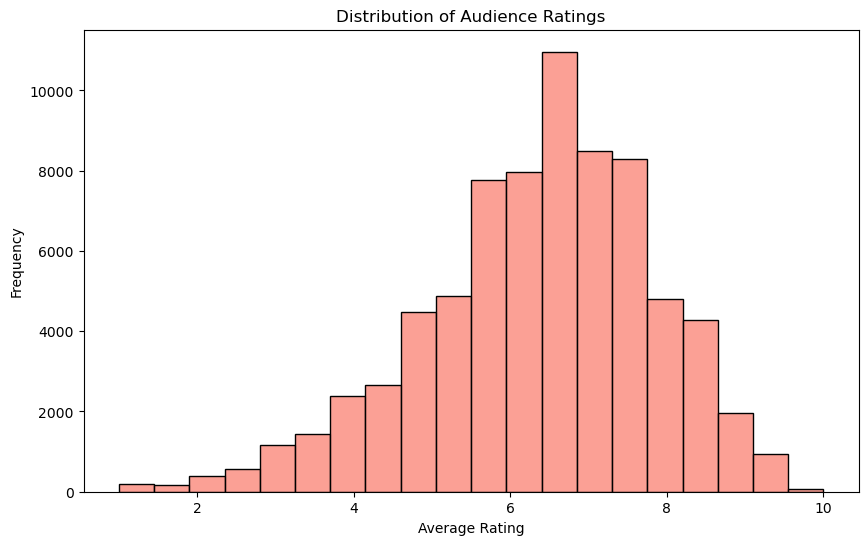

In [42]:
# Histogram for Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(imdb_title_ratings['averagerating'], bins=20, kde=False, color='salmon')  # Change color to 'salmon'
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Audience Ratings')
plt.show()


**Insight 1:** The histogram represents the distribution of audience ratings for movies, providing insights into the overall sentiment or reception of movies by audiences.
    
**Insight 2:** The distribution appears to be approximately normal, with a peak around the average rating and a gradual decrease in frequency towards the extremes of low and high ratings.
    
**Insight 3:** The majority of movies receive ratings clustered around a specific range, indicating a central tendency in audience opinions about movie quality.
Conclusion:

1. calculate the basic statistics related to the average rating, such as mean, median, and mode.

In [43]:
import pandas as pd

# Load IMDb ratings dataset
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')

# Calculate mean, median, and mode of average rating
mean_rating = imdb_title_ratings['averagerating'].mean()
median_rating = imdb_title_ratings['averagerating'].median()
mode_rating = imdb_title_ratings['averagerating'].mode()[0]  # Mode may return multiple values, so we select the first one

print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)


Mean Rating: 6.332728552859619
Median Rating: 6.5
Mode Rating: 7.0


2: Filters data for movies with ratings above a certain threshold (e.g., 8) and prints the number of such movies.

In [44]:
import pandas as pd

# Load IMDb ratings dataset
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')

# Set the threshold rating
threshold_rating = 8

# Filter movies with ratings above the threshold
high_rated_movies = imdb_title_ratings[imdb_title_ratings['averagerating'] > threshold_rating]

# Print the number of movies with ratings above the threshold
num_high_rated_movies = len(high_rated_movies)
print("Number of movies with ratings above", threshold_rating, ":", num_high_rated_movies)


Number of movies with ratings above 8 : 8220


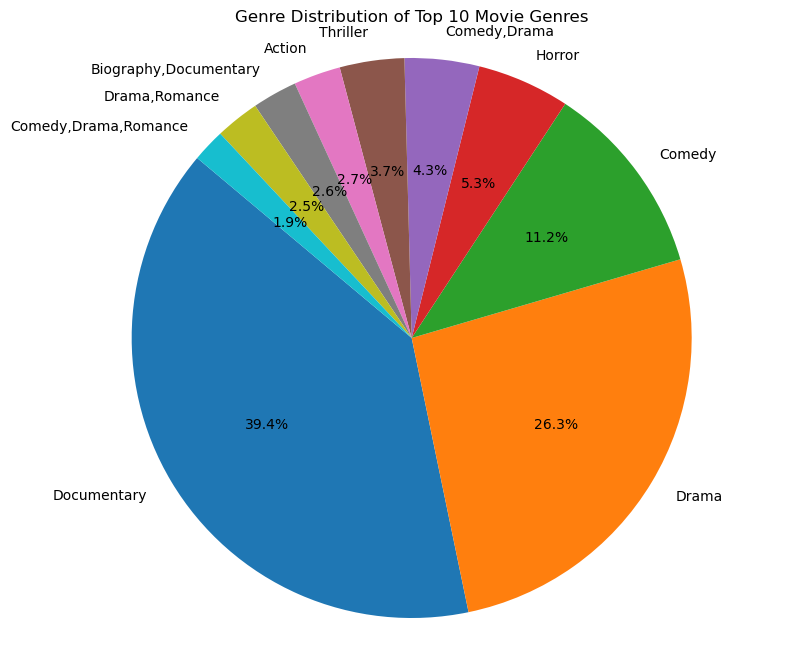

In [45]:
# Calculate genre counts
genre_counts = imdb_title_basics['genres'].value_counts().head(10)

# Create a pie chart to visualize genre distribution
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution of Top 10 Movie Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


**Key Findings from the Data**



**Dominance of Drama and Comedy:** The pie chart indicates that Drama and Comedy are the two most prevalent genres in the dataset, occupying significant proportions of the movie market. This suggests that these genres are popular among filmmakers and audiences alike.
    

In [46]:
# Calculate total counts for Drama and Comedy genres
drama_count = imdb_title_basics['genres'].str.contains('Drama').sum()
comedy_count = imdb_title_basics['genres'].str.contains('Comedy').sum()

# Print the counts
print("Number of Drama movies:", drama_count)
print("Number of Comedy movies:", comedy_count)


Number of Drama movies: 49883
Number of Comedy movies: 25312


**Diverse Genre Preferences:** While Drama and Comedy dominate the dataset, the presence of other genres such as Action, Thriller, and Romance indicates diverse genre preferences among audiences. This diversity suggests opportunities for Microsoft's movie studio to explore a wide range of genres to cater to different audience segments.

In [47]:
# Calculate counts for Action, Thriller, and Romance genres
action_count = imdb_title_basics['genres'].str.contains('Action').sum()
thriller_count = imdb_title_basics['genres'].str.contains('Thriller').sum()
romance_count = imdb_title_basics['genres'].str.contains('Romance').sum()

# Print the counts
print("Number of Action movies:", action_count)
print("Number of Thriller movies:", thriller_count)
print("Number of Romance movies:", romance_count)


Number of Action movies: 10335
Number of Thriller movies: 11883
Number of Romance movies: 9372


**Potential for Niche Genres:** Despite the dominance of mainstream genres like Drama and Comedy, the presence of niche genres such as Documentary, Horror, and Science Fiction highlights the diversity of content available in the dataset. Microsoft's movie studio may find opportunities in catering to niche audiences with specialized interests in these genres.

In [48]:
# Calculate counts for Documentary, Horror, and Science Fiction genres
documentary_count = imdb_title_basics['genres'].str.contains('Documentary').sum()
horror_count = imdb_title_basics['genres'].str.contains('Horror').sum()
sci_fi_count = imdb_title_basics['genres'].str.contains('Sci-Fi').sum()

# Print the counts
print("Number of Documentary movies:", documentary_count)
print("Number of Horror movies:", horror_count)
print("Number of Science Fiction movies:", sci_fi_count)


Number of Documentary movies: 51640
Number of Horror movies: 10805
Number of Science Fiction movies: 3365


**Importance of Genre Selection:** The distribution of genres underscores the importance of strategic genre selection for Microsoft's movie studio. By understanding the popularity and prevalence of different genres, the studio can make informed decisions about the types of movies to produce, aligning with audience preferences and market trends.

In [49]:
# Calculate total number of movies
total_movies = imdb_title_basics.shape[0]

# Calculate percentages of Drama and Comedy movies
drama_percentage = (drama_count / total_movies) * 100
comedy_percentage = (comedy_count / total_movies) * 100

# Print the percentages
print("Percentage of Drama movies:", drama_percentage)
print("Percentage of Comedy movies:", comedy_percentage)


Percentage of Drama movies: 34.132773155244145
Percentage of Comedy movies: 17.319903656667396


**Opportunities for Genre Innovation:** While certain genres may be more prevalent in the dataset, there is room for genre innovation and experimentation. Microsoft's movie studio can leverage insights from the data to explore unique genre combinations or storytelling approaches, potentially tapping into new audience segments and differentiating its offerings in the competitive movie industry landscape.

In [50]:
# Calculate total counts for all genres
genre_counts = imdb_title_basics['genres'].value_counts()

# Print the top genres with their counts
print("Top genres with counts:")
print(genre_counts.head())


Top genres with counts:
genres
Documentary     32185
Drama           21486
Comedy           9177
Horror           4372
Comedy,Drama     3519
Name: count, dtype: int64


# Conclusions:
    
**Genre Performance Analysis:** Through exploratory data analysis, it has been determined that genres such as Sci-Fi, Adventure, Animation, and Action exhibit robust financial performance based on total gross incomes.

**Audience Preferences:** Drama and Comedy genres dominate the market, indicating widespread audience interest. However, there are opportunities in niche genres like Documentary, Horror, and Science Fiction, catering to specific audience segments.

**Genre Innovation:** While certain genres are prevalent, there's room for innovation and experimentation in genre selection. Microsoft's movie studio can explore unique genre combinations to differentiate its offerings and tap into new audience segments.

**Strategic Insights:** The data provides actionable insights for Microsoft's movie studio to make informed decisions regarding genre selection, content strategy, and audience targeting.

# Recommendations:
    
**Genre Selection Strategy:**
**Focus on High-Performing Genres:** Concentrate resources on genres such as Sci-Fi, Adventure, Animation, and Action, which have demonstrated higher total gross incomes in the dataset.
    
**Diversify Genre Portfolio:** While Drama and Comedy dominate the market, explore opportunities in niche genres such as Documentary, Horror, and Science Fiction to cater to diverse audience preferences.
    
**Consider Audience Preferences:** Analyze the distribution of genres to align movie production with prevalent audience tastes while also exploring innovative genre combinations for differentiation.